In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

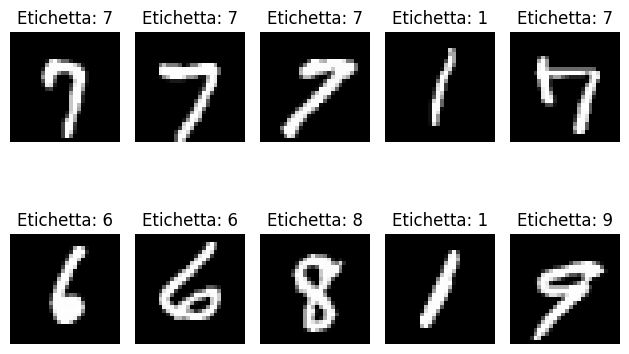

In [3]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.randint(0, X_train.shape[0], size=10)

for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.title(f'Etichetta: {(y_train[index])}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Rescaling, BatchNormalization, GlobalAveragePooling2D
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D((2, 2)))  

model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))  
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2))

# Step 3: Flatten the output and add Dense layers (fully connected layers)
model.add(Flatten())  # Flatten 3D output to 1D
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes, use softmax for classification)

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for integer labels
              metrics=['accuracy'])

# Step 5: Display model summary
model.summary()


c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,418 (833.66 KB)

 Trainable params: 213,354 (833.41 KB)

 Non-trainable params: 64 (256.00 B)

In [6]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size = 32,
                    validation_split = 0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.7473 - loss: 0.7299 - val_accuracy: 0.9797 - val_loss: 0.0709
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9637 - loss: 0.1281 - val_accuracy: 0.9907 - val_loss: 0.0364
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.9739 - loss: 0.0923 - val_accuracy: 0.9898 - val_loss: 0.0439
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9787 - loss: 0.0797 - val_accuracy: 0.9928 - val_loss: 0.0296
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9817 - loss: 0.0631 - val_accuracy: 0.9905 - val_loss: 0.0372


In [8]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9872 - loss: 0.0467


[0.03275599703192711, 0.9904999732971191]

In [9]:
prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [10]:
predicted_classes = np.argmax(prediction, axis=1)
true_classes = np.argmax(y_test, axis=1)


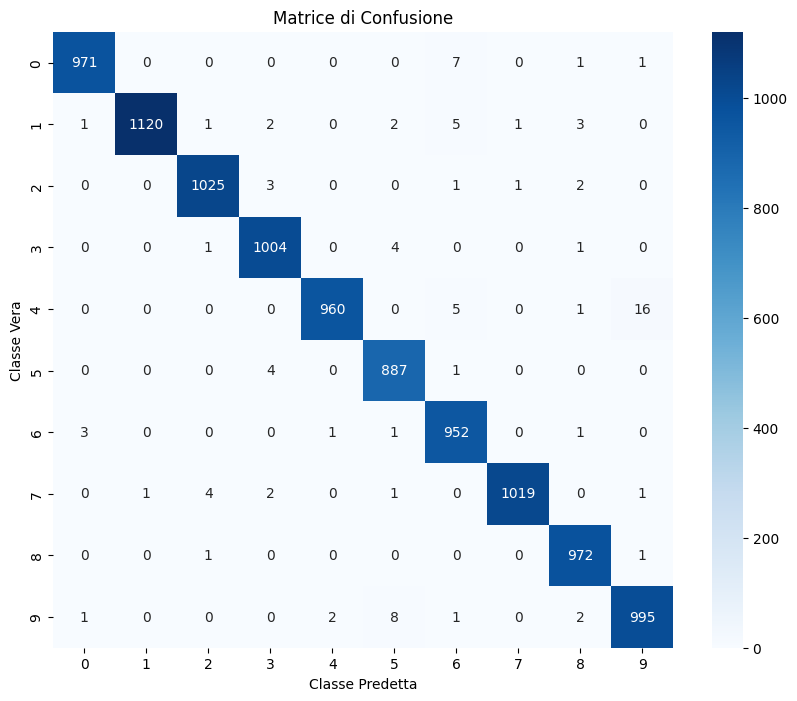

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.show()

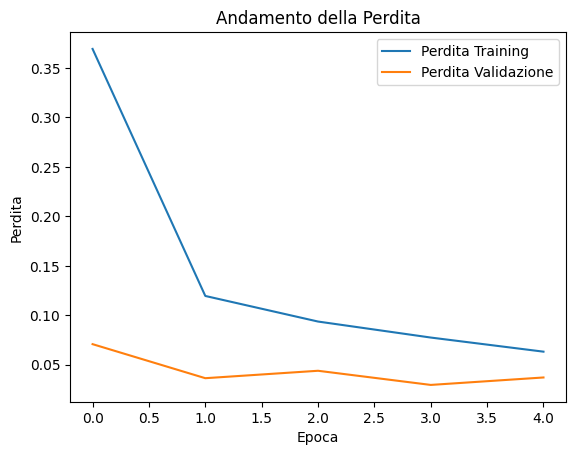

In [14]:
# Grafico perdita
plt.plot(history.history['loss'], label='Perdita Training')

plt.plot(history.history['val_loss'], label='Perdita Validazione')

plt.xlabel('Epoca')
plt.ylabel('Perdita')
plt.legend()
plt.title('Andamento della Perdita')
plt.show()

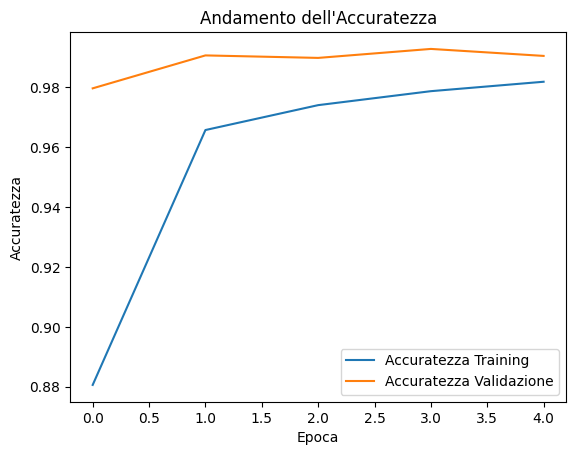

In [15]:
plt.plot(history.history['accuracy'], label='Accuratezza Training')

plt.plot(history.history['val_accuracy'],label='Accuratezza Validazione')

plt.xlabel('Epoca')
plt.ylabel('Accuratezza')
plt.legend()
plt.title('Andamento dell\'Accuratezza')
plt.show()